In [1]:
# Import TensorFlow
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:",hub.__version__)

2023-07-01 13:07:46.819836: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-01 13:07:46.914164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 13:07:47.392764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TF version: 2.12.0
TF Hub version: 0.13.0


In [2]:
import tensorflow as tf

if tf.test.is_gpu_available():
  print("GPU is available")
else:
  print("GPU is not available")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


2023-07-01 13:07:48.261915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:07:48.313227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:07:48.313344: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2023-07-01 13:07:48.372885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:07:48.373044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:07:48.373169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

2023-07-01 13:07:48.384284: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:07:48.384363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:07:48.384417: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.21667488899998943
GPU (s):
0.0271382790000132
GPU speedup over CPU: 7x


## Getting out data ready (turning into Tensors)

With all machine learning models, out data has to be in numerical format. So to do that we need to turn out images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [5]:
# Check out the labels of our data
import pandas as pd
labels_csv = pd.read_csv("data/labels.csv")
print(labels_csv.describe())
print()
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

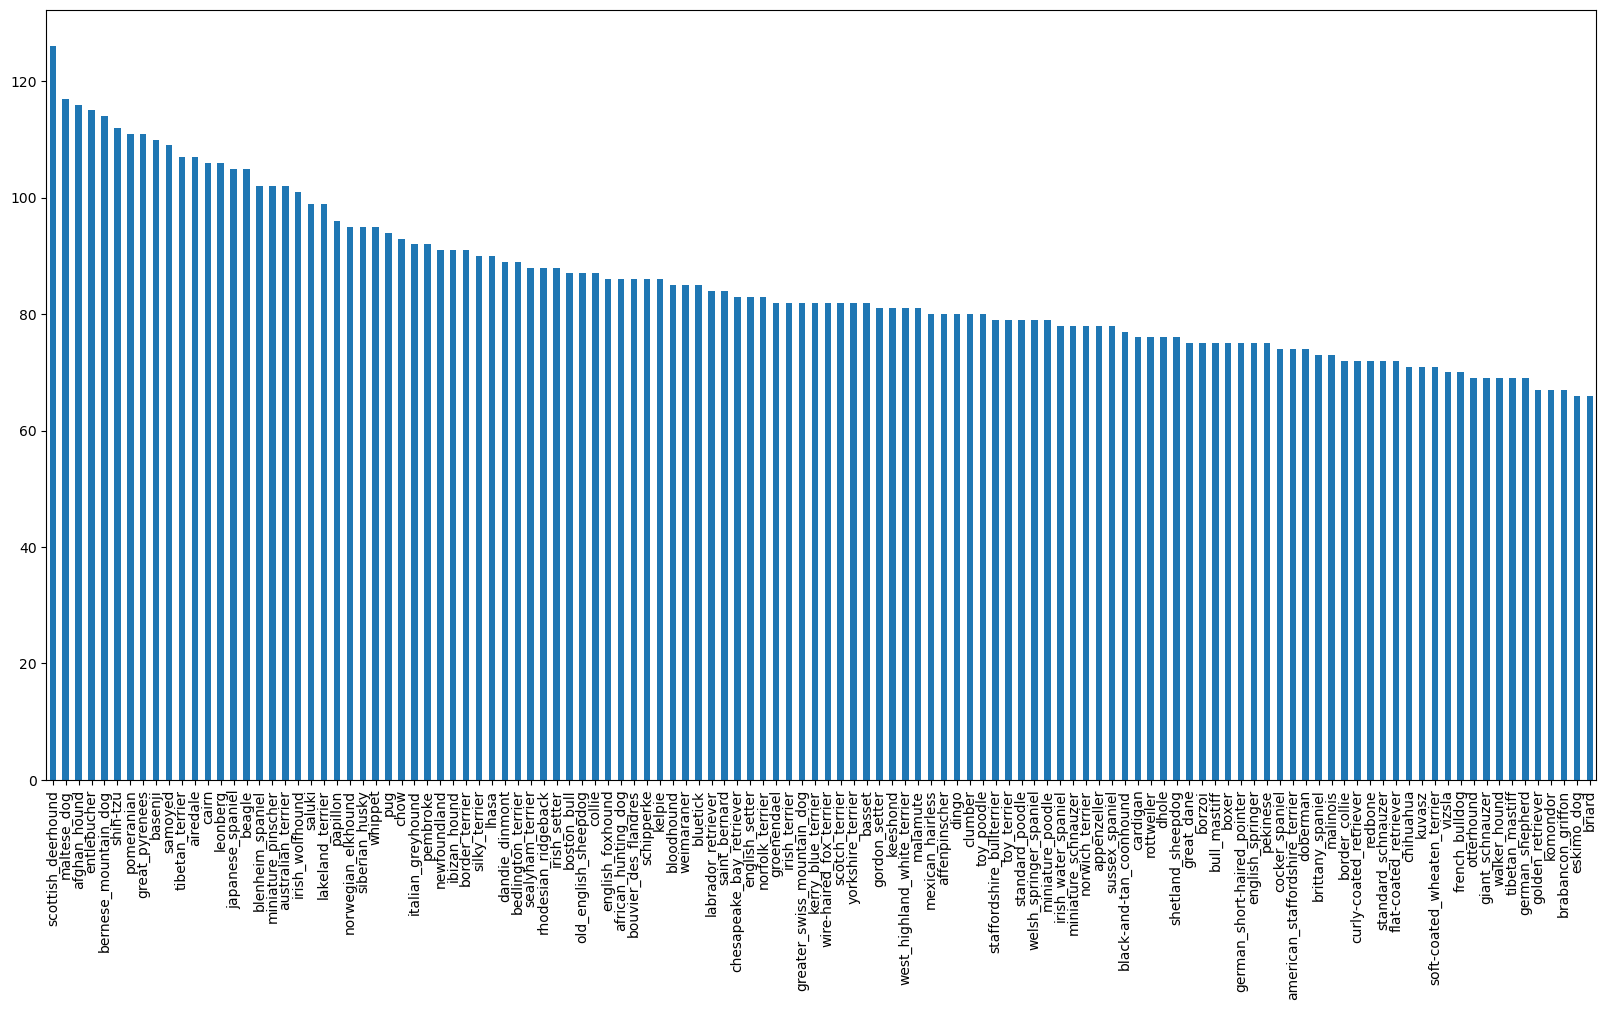

In [7]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize = (20,10))

In [8]:
labels_csv["breed"].value_counts().median()

82.0

In [9]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

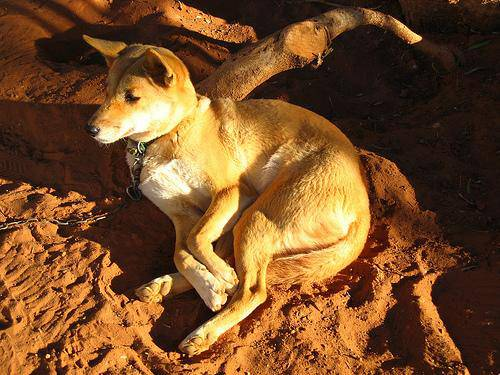

In [10]:
# Let's view an image
from IPython.display import Image
Image("data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all our image file path names

In [11]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [12]:
# Create pathnames with image ID's
filenames = ["data/train/"+fname +".jpg" for fname in labels_csv["id"]]

filenames

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'data/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'data/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'data/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'data/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'data/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 'data/train/00792e341f3c6eb33663e415d0715370.jpg',
 'data/train/007b5a16db9d9ff9d7ad39982703e429.jpg',
 'data/train/007b8a07882822475a4ce6581e70b1f8.jpg',
 'data/train/007ff9a78eba2aebb558afea3a51c469.jpg',
 'data/train

In [13]:
# Check wether number of filenames matches number of actual image files
import os
if len(os.listdir("data/train/")) == len(filenames):
    print("Filenames match equal amount of files.")
else:
    print("Filenames do no match actual amount of files, check the target directory.")

Filenames match equal amount of files.


In [14]:
os.listdir("data/train/")[:10]

['2ee404ea374b264dfc4f47bac97190ea.jpg',
 '8e94ccf10370e5d5d49972353ade1f2f.jpg',
 '8a2519eb2577ce76ccedd4283f44354c.jpg',
 '71af1fe980912bff572e4dd086904f15.jpg',
 'bedae99cee6a6dea3726f299e26e5ae4.jpg',
 '0b97116ed04c8f0f7eb4a2b4b2620476.jpg',
 'b12779f9c69a049eaa53a01919942d55.jpg',
 'b1fcbc9b6ba9c36d53eef5229e54f815.jpg',
 '170b803738598c2466457271f98f647c.jpg',
 'e9fc775bd40d6d7273ff093fa12a0574.jpg']

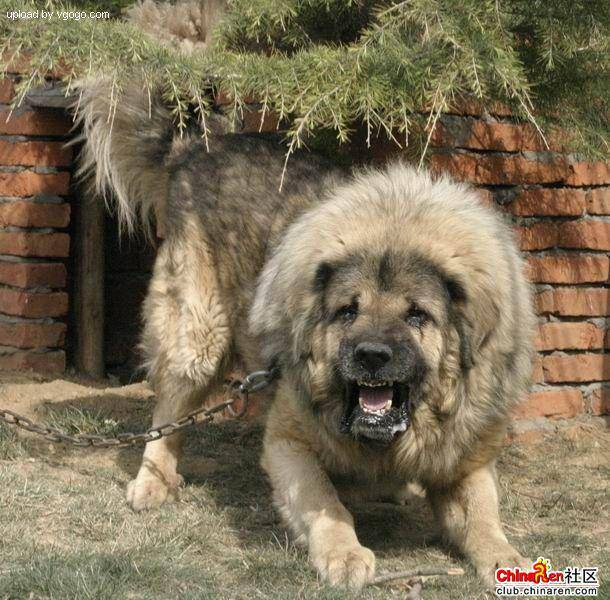

In [15]:
# One more check
Image(filenames[9000])

In [16]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [17]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [18]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # Does the same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
len(labels)

10222

In [20]:
# See if number of lbaels matches the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("Number of labels does not match number of filenames, check directories!")

Number of labels matches number of filenames!


In [21]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [22]:
# Turn a single label into an array of booleans 
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels)

10222

In [25]:
np.argmax(boolean_labels)

19

In [26]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [27]:
filenames[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating out own validatioun set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own

In [28]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [29]:
len(filenames)

10222

We're going to start off experimenting iwth 1000 images and increase as needed

In [30]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000

In [31]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size = 0.2, 
                                                  random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [32]:
# Let's have a geez at the training data
X_train[:5], y_train[:5]

(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors, we're going to write a function which does a fews things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable called `image`
3. Turn out image `image` into Tensors
4. Noramlize our image, convert values of 0-255 to 0-1
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

Before we do, let's see what importing and image looks like

In [33]:
# Convert to image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [34]:
image.max(), image.min()

(255, 0)

In [35]:
image[0][0][0]

89

In [36]:
image[0][0]

array([ 89, 137,  87], dtype=uint8)

In [37]:
image[0]

array([[ 89, 137,  87],
       [ 76, 124,  74],
       [ 63, 111,  59],
       ...,
       [ 76, 134,  86],
       [ 76, 134,  86],
       [ 76, 134,  86]], dtype=uint8)

In [38]:
image[0][1][2]

74

In [39]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [40]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [41]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Now we've seen what an image looks like as a tensor, let's preprocess them
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable called `image`
3. Turn out image `image` into Tensors
4. Noramlize our image, convert values of 0-255 to 0-1
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

In [42]:
# Defin image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
    '''
    Takes an image file path and turns the image into a Tensor
    '''
    # Read in an image
    image = tf.io.read_file(image_path)
    # Turn image into a tensor with 3 color channels (Red, Green, Blue)
    image = tf.io.decode_jpeg(image, channels = 3)
    # Turn to be from values 0 to 1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the tensor to 224, 224
    image = tf.image.resize(image, [img_size, img_size])
    return image
    
tensor = process_image(filenames[0])
print(tensor)

tf.Tensor(
[[[0.5705322  0.33588538 0.15008473]
  [0.66901225 0.4601166  0.26022965]
  [0.61062384 0.43763596 0.21601713]
  ...
  [0.8182312  0.7297958  0.26963907]
  [0.72454786 0.6059109  0.2653059 ]
  [0.7494603  0.6252918  0.32456532]]

 [[0.6761415  0.4733761  0.30642927]
  [0.5672121  0.38192675 0.20349538]
  [0.5883547  0.4322571  0.2403155 ]
  ...
  [0.9326942  0.8260503  0.41093278]
  [0.86072475 0.74250627 0.3694122 ]
  [0.76781666 0.6461604  0.29291284]]

 [[0.46350825 0.29595745 0.1536156 ]
  [0.42554107 0.27039403 0.12009468]
  [0.7887875  0.6547362  0.49015   ]
  ...
  [0.89372385 0.7696401  0.41811958]
  [0.88609535 0.7585918  0.36495727]
  [0.8243601  0.69494826 0.2930575 ]]

 ...

 [[0.7344025  0.4716574  0.2559711 ]
  [0.7137255  0.45882356 0.24705884]
  [0.73858845 0.48431677 0.27286717]
  ...
  [0.70885915 0.5011093  0.3242799 ]
  [0.8884395  0.6805963  0.4820492 ]
  [0.8582441  0.65040094 0.4518538 ]]

 [[0.73006743 0.46732238 0.2516361 ]
  [0.7170148  0.46211284 0

## Turning our data into batches

Why turn out data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into a memory.

So that's why we do 32 (this is the batch size) images at a time (you can manually adjust the batch size if needs be)

In order to use Tensorflow efffectively, we need our data in the form of Tensor tuples, whihc looks like this:
`(image, label)`

In [43]:
# Create a simple function to return a tuple of tensors
def get_image_label(image_path, label):
    '''
    Takes an image file path name and associated label,
    processes the iamge and returns a type of (image, label)'''
    image = process_image(image_path)
    return image, label

In [44]:
process_image(X[42]), tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way tto turn out dat ainto tuples of tensors in the form: `(image, label)`, let's make a function to turn all our data (x, y) into batches!

In [45]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
    '''
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels).
    '''
    # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    # If the data is valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Create training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor functrion is faster than shuffling images
        data = data.shuffle(buffer_size = len(X))
        
        # Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
        
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        
    return data_batch

In [46]:
# Create a training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Create training data batches...
Creating validation data batches...


In [47]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [48]:
import tensorflow as tf

# Create a dataset of numbers
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5])

# Define a transformation function
def multiply_by_two(x):
    return x * 2

# Apply the transformation function using map
transformed_dataset = dataset.map(multiply_by_two)

# Iterate over the transformed dataset and print the elements
for element in transformed_dataset:
    print(element)


tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


2023-07-01 13:07:50.539986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [5]
	 [[{{node Placeholder/_0}}]]


In [49]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [50]:
import matplotlib.pyplot as plt

# Create a function for viewing images in data batch
def show_25_images(images, labels):
    '''
    Displays a plot of 25 images and their labels from data batch
    '''
    # Setup the figure
    plt.figure(figsize = (10,10))
    # Loop through 25 of the displaying images
    for i in range(25):
        #Create subplots( 5 rows, 5 columns)
        ax = plt.subplot(5,5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")

In [51]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [52]:
len(train_data)

25

In [53]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

2023-07-01 13:07:50.594952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [800,120]
	 [[{{node Placeholder/_1}}]]
2023-07-01 13:07:50.595049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [800,120]
	 [[{{node Placeholder/_1}}]]


(array([[[[0.07058824, 0.06666667, 0.0509804 ],
          [0.07377452, 0.06985295, 0.05416667],
          [0.07450981, 0.07058824, 0.05490196],
          ...,
          [0.6536765 , 0.6536765 , 0.30857843],
          [0.65024513, 0.65024513, 0.30514708],
          [0.64705884, 0.64705884, 0.3019608 ]],
 
         [[0.05626751, 0.05234594, 0.03665967],
          [0.05945379, 0.05553222, 0.03984594],
          [0.06265046, 0.05872888, 0.04304261],
          ...,
          [0.6393558 , 0.6393558 , 0.2942577 ],
          [0.63659567, 0.63659567, 0.29149762],
          [0.6363183 , 0.6363183 , 0.29122025]],
 
         [[0.0414916 , 0.03757003, 0.02188376],
          [0.04740186, 0.04348028, 0.02779401],
          [0.05376675, 0.04984518, 0.0341589 ],
          ...,
          [0.62898016, 0.6390379 , 0.29729244],
          [0.628589  , 0.6386467 , 0.2969013 ],
          [0.628589  , 0.6386467 , 0.2969013 ]],
 
         ...,
 
         [[0.69373184, 0.68645763, 0.45622298],
          [0.76742

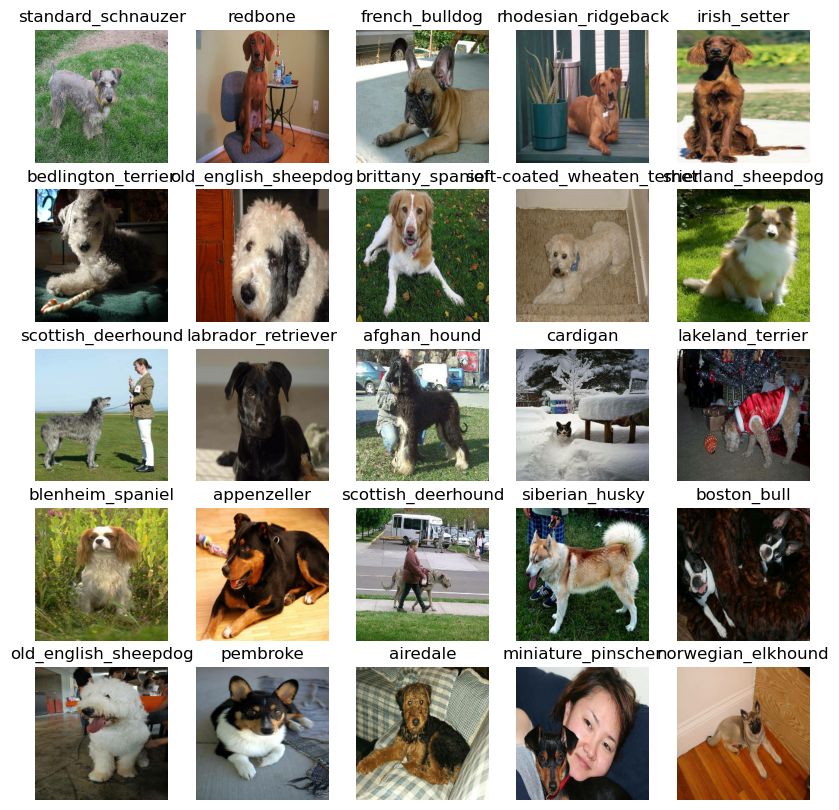

In [54]:
train_images, train_labels = next(train_data.as_numpy_iterator())
# Now let's visualize the data
show_25_images(train_images, train_labels)

In [55]:
len(train_data)

25

In [56]:
len(val_data)

7

In [57]:
for val in val_data:
    print(val)

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],

        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],

        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],

        ...,

        [[0.9746779 , 0.9878955 

2023-07-01 13:07:51.268206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


In [58]:
for train in train_data:
    print(train_data)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dty

In [59]:
val_images, val_labels = next(val_data.as_numpy_iterator())
val_images, val_labels

(array([[[[0.29599646, 0.43284872, 0.3056691 ],
          [0.26635826, 0.32996926, 0.22846507],
          [0.31428418, 0.27701408, 0.22934894],
          ...,
          [0.77614343, 0.82320225, 0.8101595 ],
          [0.81291157, 0.8285351 , 0.8406944 ],
          [0.8209297 , 0.8263737 , 0.8423668 ]],
 
         [[0.2344871 , 0.31603682, 0.19543913],
          [0.3414841 , 0.36560842, 0.27241898],
          [0.45016077, 0.40117094, 0.33964607],
          ...,
          [0.7663987 , 0.8134138 , 0.81350833],
          [0.7304248 , 0.75012016, 0.76590735],
          [0.74518913, 0.76002574, 0.7830809 ]],
 
         [[0.30157745, 0.3082587 , 0.21018331],
          [0.2905954 , 0.27066195, 0.18401104],
          [0.4138316 , 0.36170745, 0.2964005 ],
          ...,
          [0.79871625, 0.8418535 , 0.8606443 ],
          [0.7957738 , 0.82859945, 0.8605655 ],
          [0.75181633, 0.77904975, 0.8155256 ]],
 
         ...,
 
         [[0.9746779 , 0.9878955 , 0.9342279 ],
          [0.99153

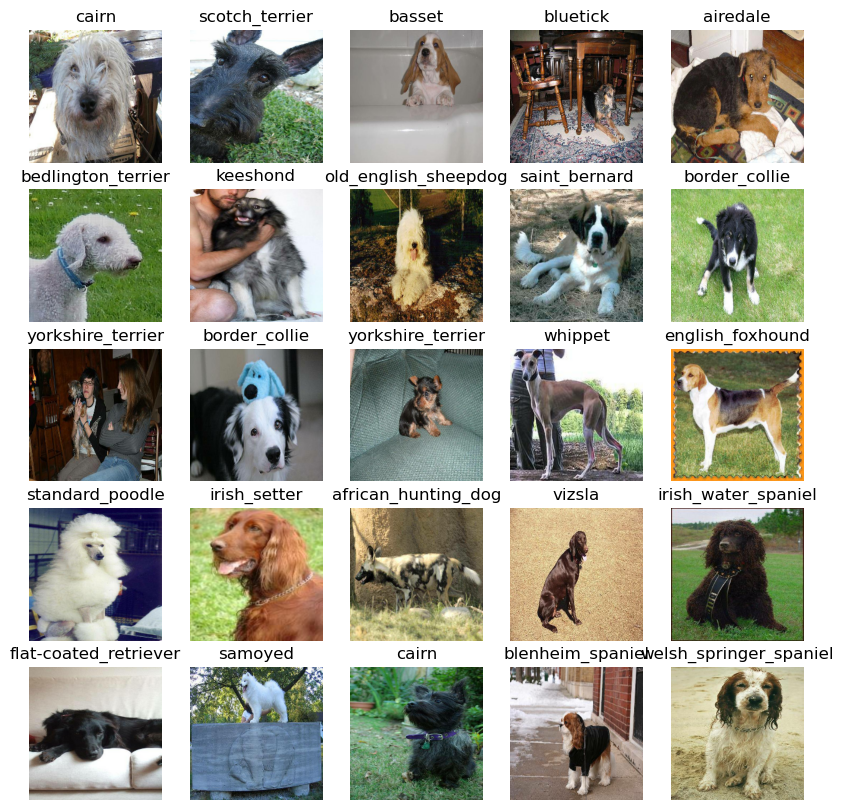

In [60]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Build a model

Before we build a model, there are a few things that we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [61]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [62]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model

Konwing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as paramters
* Defines the layers in the Kreas model in a sequential fashion?
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras


In [63]:
# Create a funciton which builds a Keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
    print("Building a model with:", MODEL_URL)
    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
        tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                              activation = "softmax")
    ])
    
    # Compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    
    # Build the model
    model.build(INPUT_SHAPE)
    
    return model

In [64]:
model = create_model()
model.summary()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [65]:
outputs = np.ones(shape = (1, 1, 1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating callbacks

Callbacks are helper functions a model can use when during training to do thigns such as save it's progress, check it's progress or stop training early if model stops improving.

We will create two callbacks, one for TensorBoard which helps track our models progress and another for stopping early which prevents our model from training for too long.
### Tensorboard Callback
To setup the TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callba k which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with `%tensorboard` magic function (we'll do this after our model training)

In [66]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [67]:
import datetime

# Create a function to build TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join("/home/anaximander/ML-Course/dog-classification/logs/",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    
    return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping Callback

Early stopping help sour stop model from overfitting by stopping training if a certain evaluation metrics stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [68]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', 
                                                  patience = 3)

## Training a model (on a subset of data)

Our first model is only going to train on 1,000 images to make sure that everything is working.

In [69]:
NUM_EPOCHS = 100

In [70]:
# Check to make sure we're still running on a GPU
print("GPU","available (YES)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YES)


Let's create a function which trains a model.
* Create a model using `create_model()`
* Setup a TensorBoard using a callback `create_tensor_callback()`
* Call the `fit()` function on our model passwing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model

In [71]:
# Build a fuanction to train and return a trained model.
def train_model():
    '''
    Trains a given model and returns the trained version.
    '''
    # create a model
    model = create_model()
    
    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()
    
    # Fit the model to the data passing it the callbacks we created
    model.fit(x = train_data, 
              epochs = NUM_EPOCHS, 
              validation_data = val_data, 
              validation_freq = 1, 
              callbacks = [tensorboard, early_stopping])
    # Return the fitted model
    return model

In [72]:
# Fit the model to the data
model = train_model()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100


2023-07-01 13:07:55.439613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,1001]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2023-07-01 13:07:55.439658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/zeros_like/StatefulPartitionedCall' with dtype float and shape [?,1001]
	 [[{{node gradients/zeros_like/StatefulPartitionedCall}}]]
2023-07-01 13:07:55.439679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicat

2023-07-01 13:07:56.222338: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-01 13:07:56.254379: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5fe43a3f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-01 13:07:56.254393: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-07-01 13:07:56.266208: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-01 13:07:56.403544: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 [==============================] - 2s 33ms/step - loss: 4.5442 - accuracy: 0.1163 - val_loss: 3.3979 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 1.6389 - accuracy: 0.6775 - val_loss: 2.1823 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 0.5803 - accuracy: 0.9237 - val_loss: 1.6776 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 1s 23ms/step - loss: 0.2579 - accuracy: 0.9800 - val_loss: 1.5041 - val_accuracy: 0.6600
Epoch 5/100
25/25 [==============================] - 1s 21ms/step - loss: 0.1483 - accuracy: 0.9975 - val_loss: 1.4291 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 1s 23ms/step - loss: 0.1002 - accuracy: 1.0000 - val_loss: 1.3824 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0751 - accuracy: 1.0000 - val_loss: 1.3471 - val_accuracy: 0.6600
Epoch 8/100
25/25 

**Question:** it looks like our data is overfitting what are some ways to prevent overfitting in deep learning neural networks
**Note:** Overfitting to begin with is a good thing! It means our model is learning.

### Checking the TensorBoard logs

The TensorBoard magic function(`%tensorboard`) will access the logs directory we created and visualize its contents

In [73]:
%tensorboard --logdir /home/anaximander/ML-Course/dog-classification/logs

## Making and evaluating predictions using a trained model

In [74]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [75]:
# Making predcitions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose = 1)
predictions

7/7 [==============================] - 0s 14ms/step


array([[5.65045280e-04, 2.50021822e-05, 9.12283547e-04, ...,
        4.61499876e-04, 1.88015511e-05, 4.45128465e-03],
       [5.46298223e-04, 3.49583133e-04, 1.09977154e-02, ...,
        1.54633759e-04, 3.51330789e-04, 1.81399679e-04],
       [2.54250949e-06, 9.66057341e-05, 2.78558378e-04, ...,
        4.35704933e-05, 1.29258086e-04, 1.02503451e-04],
       ...,
       [4.70010264e-07, 1.13121996e-05, 5.77597621e-06, ...,
        1.54354966e-05, 1.68566490e-04, 1.15611343e-04],
       [3.98476562e-03, 1.09005145e-04, 8.30827630e-05, ...,
        1.51350207e-04, 4.96151006e-05, 8.41511507e-03],
       [1.76352612e-03, 1.82907879e-05, 3.60434118e-04, ...,
        8.16831645e-03, 3.39569553e-04, 5.66218951e-05]], dtype=float32)

In [76]:
predictions.shape

(200, 120)

In [77]:
np.max(predictions[[0]]), np.argmax(predictions[[0]])

(0.19999458, 17)

In [78]:
# First prediction
index = 113
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[[index]])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[5.65045280e-04 2.50021822e-05 9.12283547e-04 2.22700201e-05
 1.86853111e-03 2.83118170e-05 1.84937686e-01 9.26434295e-04
 3.63302170e-05 1.93370288e-04 4.51487140e-04 7.45684083e-05
 2.61370995e-04 1.46833423e-04 2.23126757e-04 3.44381668e-04
 5.61287088e-05 1.99994579e-01 3.66373752e-05 2.24875148e-05
 8.36580584e-04 2.63860187e-04 3.57679778e-06 1.53279305e-03
 7.12115434e-05 1.63694363e-04 1.96904376e-01 8.62345332e-05
 3.44143977e-04 1.31200431e-04 2.00685914e-04 3.61206103e-03
 6.24635664e-04 2.94890306e-05 2.94158759e-04 9.42332391e-03
 1.31169465e-04 4.60708136e-04 1.64464684e-04 1.11934081e-04
 3.01751483e-04 7.43381406e-06 1.13170236e-05 6.01866559e-05
 8.49222488e-06 9.31114992e-05 5.17216067e-05 1.93173779e-04
 6.54467731e-04 2.53081787e-04 2.65833689e-04 1.31100038e-04
 1.88829625e-04 3.12573044e-04 3.95162118e-04 2.38266202e-05
 4.23081539e-04 4.86240402e-04 6.07375812e-04 2.57765818e-02
 2.02847717e-04 1.01501855e-05 2.77339970e-03 8.45908944e-05
 7.60634779e-04 1.657799

Having the above functionality is great but we want to be able to do it at scale.

And it would be better if we could see the image prediction beind made on!

**Note:** Prediction probabilities are also known as confidence levels

In [79]:
# Turn probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    '''
    Turns an array of prediction probabilities into a label.
    '''
    return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Now since our validation data is still in a batch dataset, we'll have to unbachify it to predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [80]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [81]:
# Create a function to unbatch a batch dataset
images_ = []
labels_ = []

# Loop through unbatched ata
for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)
images_[0], labels_[0]

2023-07-01 13:08:07.583422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [82]:
get_pred_label(labels_[0])

'cairn'

In [83]:
get_pred_label(predictions[0])

'border_terrier'

In [84]:
def unbatchify(data):
    '''
    Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and lbels.
    '''
    # Create a function to unbatch a batch dataset
    images = []
    labels = []

    # Loop through unbatched ata
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

2023-07-01 13:08:07.678460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get
* Prediction labels
* Validation labels (truth labels)
* Validation images
Let's make some functions to make all a bit more visualize
 *Takes an array of prediction probabilities, an array of truth labels and an array of images and integers
 * Convert the prediction probabilities to a predicted label
 * Plot the predicted label and it's predicted probability, the turth label and the target image on a signple plot

In [85]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
    '''
    View the prediction, ground truth and image for sample n
    '''
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
    
    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    # Plot the image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), color = color)

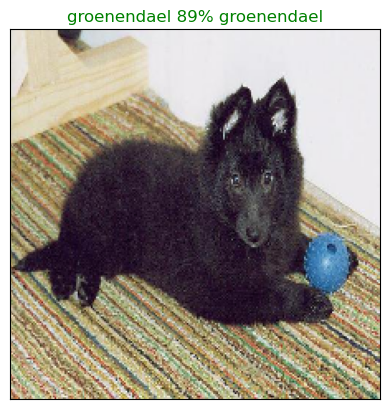

In [86]:
plot_pred(prediction_probabilities = predictions, labels = val_labels, images = val_images, n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
 * Prediction probabilities indexes
 * Prediction proabilities avlues
 * Predicti8on labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [87]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    '''
    Plus the top 10 highest prediction confidences along with the truth label for sample n.
    '''
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    
    # Get the prediction label
    pred_label = get_pred_label(pred_prob)
    
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # Find the top 10 confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                       top_10_pred_values, 
                       color = 'grey')
    
    plt.xticks(np.arange(len(top_10_pred_labels)), 
               labels = top_10_pred_labels, 
               rotation = 'vertical')
    
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass
    


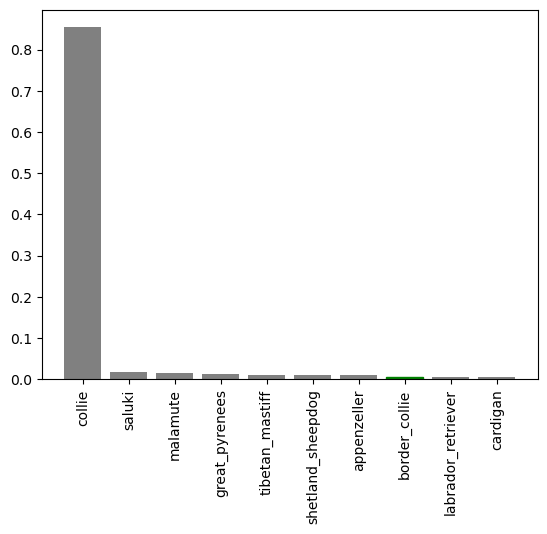

In [88]:
plot_pred_conf(prediction_probabilities = predictions, 
               labels = val_labels, 
               n = 9)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check this out

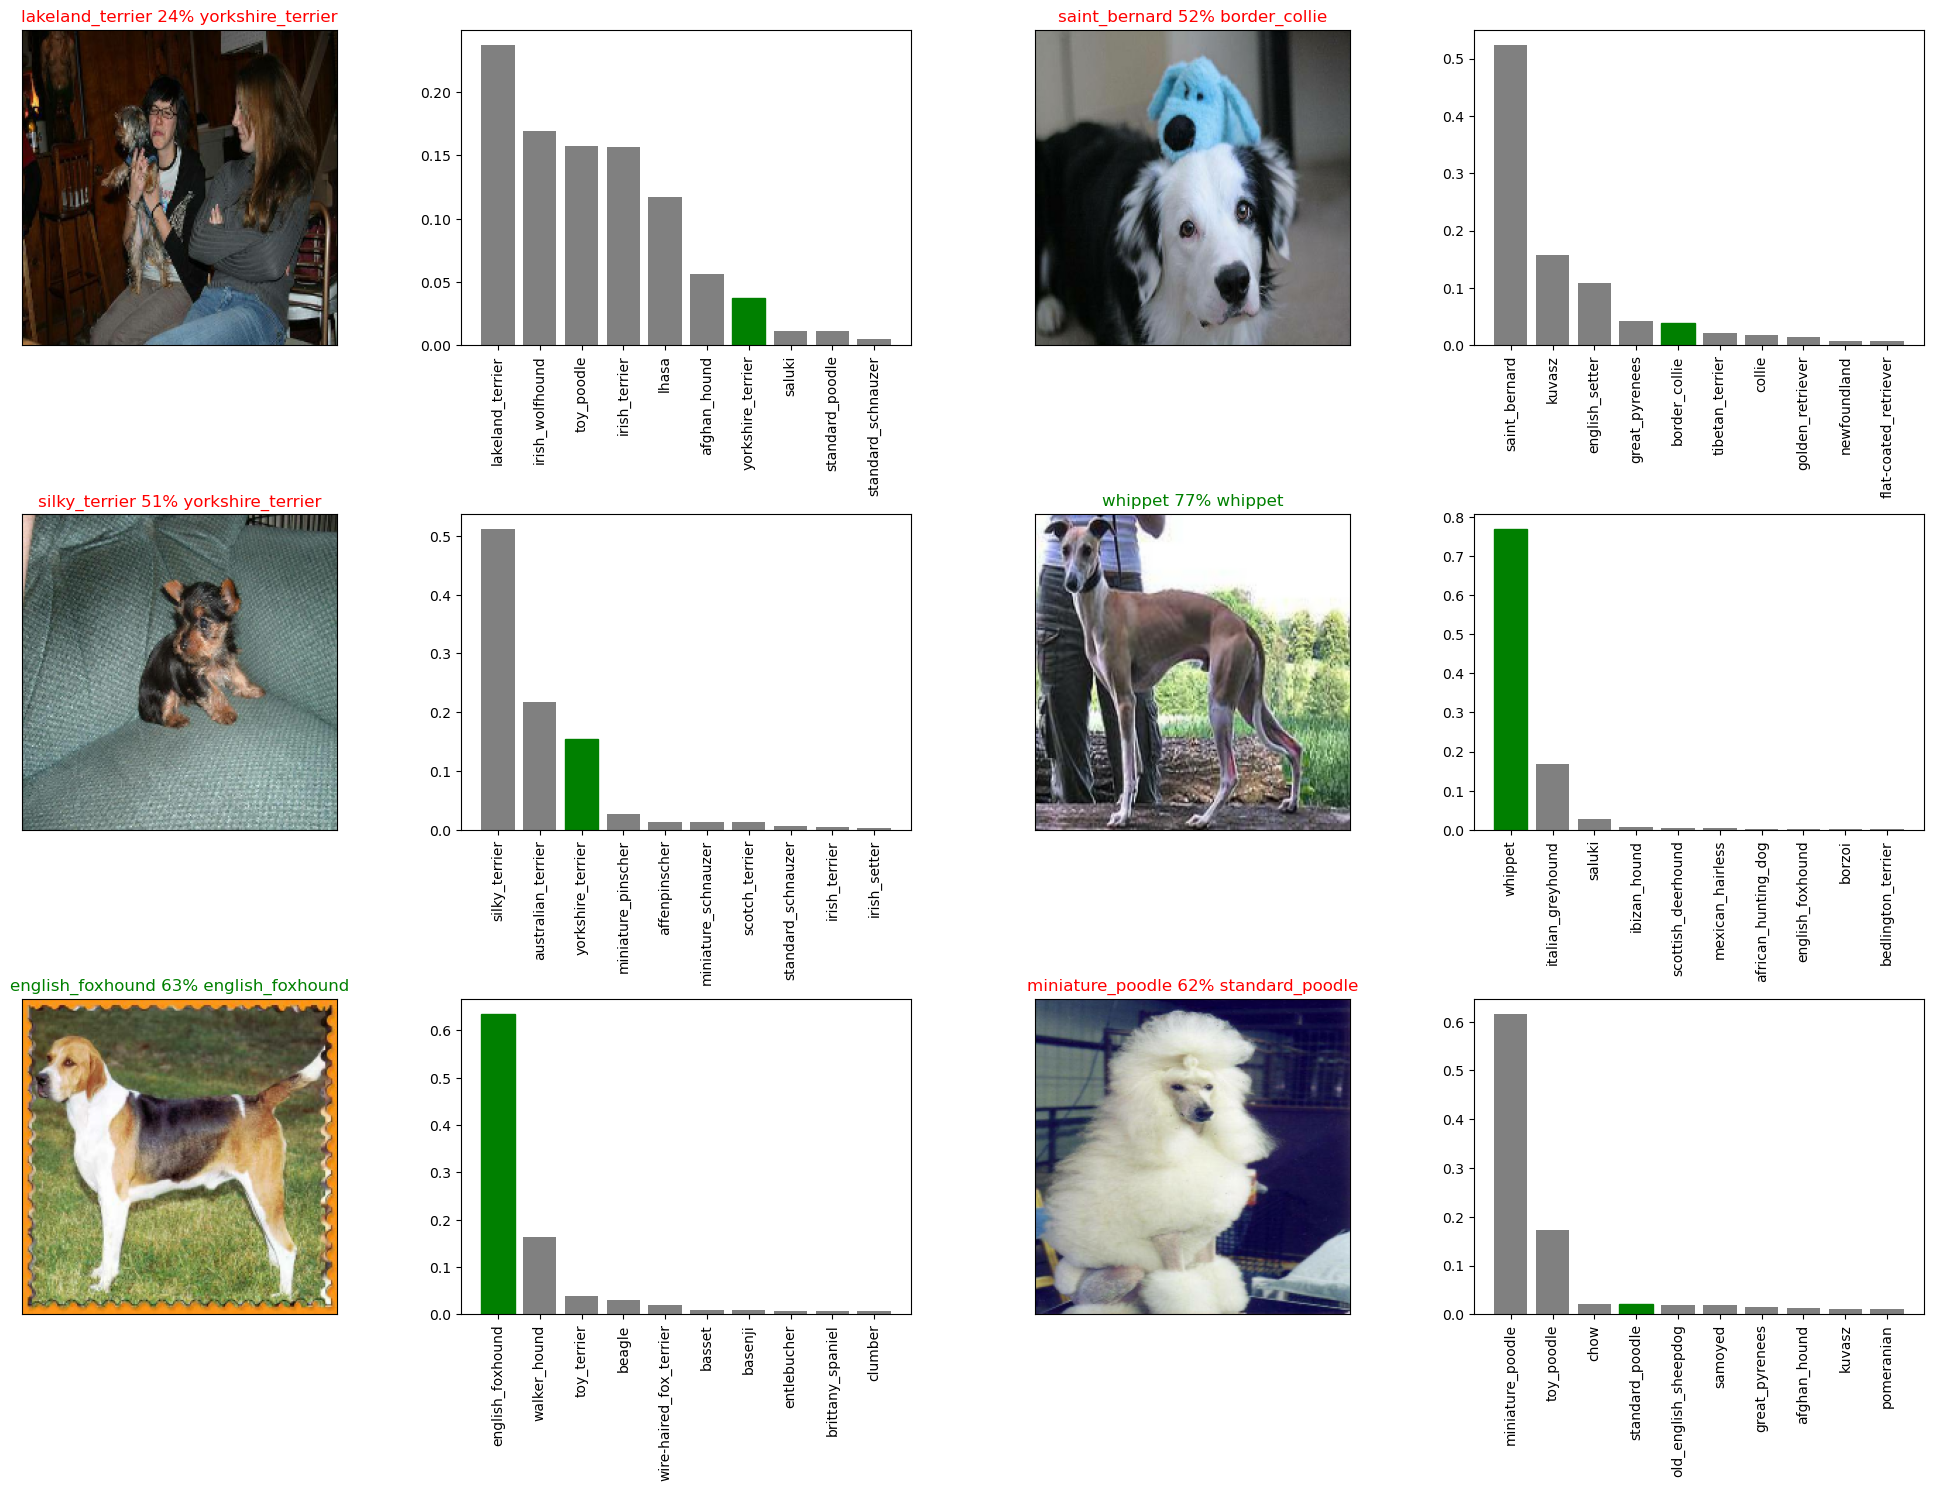

In [89]:
# Let's check a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

**Challenge:** How would you create a confusion matrix with our models and predictions na

## Saving and reloading a trained model 

In [94]:
# Create a function to save a model
def save_model(model, suffix = None):
    '''
    Saves a given model in a directory and appends a s;uffix (string).
    '''
    
    # Create a model directory pathname with current time
    modeldir = os.path.join("/home/anaximander/ML-Course/dog-classification/models/")
    
    model_path = modeldir+"-"+ suffix + ".h5"
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

# Create a function to load a trained model
def load_model(model_path):
    '''
    Loads a saved model from a specified path.
    '''
    print(f"Loading a saved model from {model_path}")
    model = tf.keras.models.load_model(model_path, 
                                       custom_objects = {"KerasLayer":hub.KerasLayer})
    
    return model

Now we've got functions to svae and load a traine dmodel, let's make sure they work!

In [95]:
# Save our model trianed on 1000 images
save_model(model, suffix = "1000-images-mobilenetv2-Adam")

Saving model to: /home/anaximander/ML-Course/dog-classification/models/-1000-images-mobilenetv2-Adam.h5...


'/home/anaximander/ML-Course/dog-classification/models/-1000-images-mobilenetv2-Adam.h5'

In [96]:
# Load trained model
loaded_1000_image_model = load_model("/home/anaximander/ML-Course/dog-classification/models/-1000-images-mobilenetv2-Adam.h5")

Loading a saved model from /home/anaximander/ML-Course/dog-classification/models/-1000-images-mobilenetv2-Adam.h5


In [97]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 0s 15ms/step - loss: 1.2462 - accuracy: 0.6900


[1.2461899518966675, 0.6899999976158142]

In [98]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 0s 15ms/step - loss: 1.2462 - accuracy: 0.6900


[1.2461899518966675, 0.6899999976158142]

## Training a big model on the full data

In [99]:
len(X), len(y)

(10222, 10222)

In [100]:
X[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [101]:
len(X_train)

800

In [103]:
# Create a batch of data with the full data set
full_data = create_data_batches(X, y)

Create training data batches...


In [108]:
full_data

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [105]:
# Create a model fo full model
full_model = create_model()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [106]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when trainong on all the data, so we can't monitor the vlidation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy", 
                                                             patience = 3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [112]:
%%cuda --profile

UsageError: Cell magic `%%cuda` not found.


In [111]:
%time
# Fit the full model to the full data
full_model.fit(x = full_data, epochs = NUM_EPOCHS, callbacks = [full_model_tensorboard, full_model_early_stopping])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Epoch 1/100


2023-07-01 13:50:08.230895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [10222,120]
	 [[{{node Placeholder/_1}}]]
2023-07-01 13:50:08.231133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [10222,120]
	 [[{{node Placeholder/_1}}]]
2023-07-01 13:50:08.635920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/Stat

320/320 [==============================] - 7s 17ms/step - loss: 1.3329 - accuracy: 0.6716
Epoch 2/100
320/320 [==============================] - 5s 17ms/step - loss: 0.4012 - accuracy: 0.8819
Epoch 3/100
320/320 [==============================] - 5s 17ms/step - loss: 0.2394 - accuracy: 0.9332
Epoch 4/100
320/320 [==============================] - 6s 17ms/step - loss: 0.1536 - accuracy: 0.9629
Epoch 5/100
320/320 [==============================] - 6s 17ms/step - loss: 0.1059 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 6s 18ms/step - loss: 0.0791 - accuracy: 0.9855
Epoch 7/100
320/320 [==============================] - 5s 17ms/step - loss: 0.0597 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 6s 18ms/step - loss: 0.0453 - accuracy: 0.9951
Epoch 9/100
320/320 [==============================] - 6s 18ms/step - loss: 0.0381 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 6s 17ms/step - loss: 0.0326 - accuracy